In [2]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
target = "it"
G = nx.read_gml("../data/{0}/{0}_coauthorship_network.gml".format(target))
node_attributes = nx.get_node_attributes(G, "affiliation")


---

# Centrality measures

### Degree Centrality

Degree Centrality: Measures the fraction of nodes that a particular node is connected to. Higher degree centrality indicates a node with more connections.

Affiliation: Represents the department or field to which each individual belongs.

Observations:
Francesca Tomasi has the highest degree centrality, indicating a high number of connections.
Nodes with affiliations in the "DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANISTICA" dominate the top positions.
Sebastian Barzaghi (affiliated with "DIPARTIMENTO DI BENI CULTURALI") stands out among nodes from different departments.

Considerations:
The interpretation may vary based on the specific context and goals of your network analysis.
Nodes with high degree centrality can play important roles in information flow or collaboration within the network.
Affiliation information provides additional context about the academic or departmental associations of each individual.

In [4]:
degree_centrality = nx.degree_centrality(G)
dc_data = pd.DataFrame({"Name": list(degree_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in degree_centrality.keys()],
                        "DegreeCentrality": list(degree_centrality.values())
                        }).sort_values(by="DegreeCentrality", ascending=False).reset_index(drop=True)

dc_data.head(10)

Name  \
0           TOMASI, FRANCESCA   
1            CHINES, LOREDANA   
2           DAQUINO, MARILENA   
3                TINTI, PAOLO   
4              PERONI, SILVIO   
5            TAMBURINI, FABIO   
6  ANSELMI, GIAN MARIO GIUSTO   
7         BARZAGHI, SEBASTIAN   
8         MATTEUCCI, GIOVANNI   
9                LUGLI, LUISA   

                                         Affiliation  DegreeCentrality  
0  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.280528  
1  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.148515  
2  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.135314  
3  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.128713  
4  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.128713  
5  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.128713  
6  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...          0.125413  
7                     DIPARTIMENTO DI BENI CULTURALI          0.108911  
8          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE          0.102310  
9          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE          0.102310

### Betweenness Centrality

Weighted Betweenness Centrality: Measures the fraction of shortest paths that pass through a particular node, considering edge weights. Nodes with higher values have a greater influence on information flow.

Affiliation: Represents the department or field to which each individual belongs.

Observations:
Marco Antonio Bazzocchi and Francesca Tomasi have the highest weighted betweenness centrality, indicating their crucial role in connecting different parts of the network.
The top nodes span multiple departments, suggesting interdisciplinary connections.

Considerations:
Nodes with high weighted betweenness centrality act as bridges connecting different parts of the network.
The weighted betweenness centrality considers both the presence and strength of edges, providing a more nuanced perspective on node importance.
The interpretation may vary based on the specific context and goals of your network analysis.

In [5]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight="weight")

wbc_data = pd.DataFrame({"Name": list(weighted_betweenness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_betweenness_centrality.keys()],
                        "WeightedBetweennessCentrality": list(weighted_betweenness_centrality.values())
                        }).sort_values(by="WeightedBetweennessCentrality", ascending=False).reset_index(drop=True)

wbc_data.head(10)

Name  \
0     BAZZOCCHI, MARCO ANTONIO   
1            TOMASI, FRANCESCA   
2          MATTEUCCI, GIOVANNI   
3             SPAZIANTE, LUCIO   
4             PASQUINI, EMILIO   
5  ITALIA, PAOLA MARIA CARMELA   
6   ANSELMI, GIAN MARIO GIUSTO   
7            SCOROLLI, CLAUDIA   
8                VITALI, FABIO   
9             TAMBURINI, FABIO   

                                         Affiliation  \
0  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
2          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE   
3                            DIPARTIMENTO DELLE ARTI   
4                              DIP. DI ITALIANISTICA   
5  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
6  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
7          DIPARTIMENTO DI FILOSOFIA E COMUNICAZIONE   
8  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
9  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   

   WeightedBetweennessCentrality  
0                       0.390251  
1                       0.370793  
2                       0.327468  
3                       0.310318  
4                       0.300467  
5                       0.212102  
6                       0.189318  
7                       0.177137  
8                       0.153469  
9                       0.126449

### Closeness Centrality

Weighted Closeness Centrality: Measures how close a node is to all other nodes, considering edge weights. Higher values indicate nodes that are, on average, closer to all other nodes.

Affiliation: Represents the department or field to which each individual belongs.

Observations:
Gian Mario Giusto Anselmi has the highest weighted closeness centrality, indicating that, on average, this individual is close to other nodes in the network.
Nodes from various departments and fields are present in the top rankings, suggesting interdisciplinary connections.

Considerations:
Nodes with high weighted closeness centrality are well-connected to the overall network, facilitating efficient information flow.
The weighted closeness centrality accounts for both the presence and strength of edges, providing a more nuanced measure of node proximity.
The interpretation may vary based on the specific context and goals of your network analysis.

In [6]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance="weight")

wcc_data = pd.DataFrame({"Name": list(weighted_closeness_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_closeness_centrality.keys()],
                        "WeightedClosenessCentrality": list(weighted_closeness_centrality.values())
                        }).sort_values(by="WeightedClosenessCentrality", ascending=False).reset_index(drop=True)

wcc_data.head(10)

Name  \
0   ANSELMI, GIAN MARIO GIUSTO   
1  ITALIA, PAOLA MARIA CARMELA   
2             PASQUINI, EMILIO   
3            TOMASI, FRANCESCA   
4     BAZZOCCHI, MARCO ANTONIO   
5                VITALI, FABIO   
6             CHINES, LOREDANA   
7          STOPPELLI, PASQUALE   
8           BORDALEJO, BARBARA   
9     RICO MANRIQUE, FRANCISCO   

                                         Affiliation  \
0  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
2                              DIP. DI ITALIANISTICA   
3  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
4  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
5  DIPARTIMENTO DI INFORMATICA - SCIENZA E INGEGN...   
6  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
7  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
8                                               None   
9  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   

   WeightedClosenessCentrality  
0                     0.190119  
1                     0.188707  
2                     0.186940  
3                     0.180190  
4                     0.178351  
5                     0.177670  
6                     0.176548  
7                     0.174563  
8                     0.174563  
9                     0.174563

### Eigenvector centrality

Weighted Eigenvector Centrality: Measures the influence of a node in the network, considering both the presence and strength of edges. Higher values indicate nodes with greater overall influence.

Affiliation: Represents the department or field to which each individual belongs.

Observations:
Francesca Tomasi has the highest weighted eigenvector centrality, indicating significant influence in the network.
Several individuals from the Department of Filologia Classica e Italianistica have high eigenvector centrality.

Considerations:
Nodes with high weighted eigenvector centrality have a broad and influential presence in the network.
The weighted eigenvector centrality considers edge weights, providing a more nuanced measure of node influence.
Interpretation may vary based on specific network characteristics and analysis goals.

In [7]:
weighted_eigenvector_centrality = nx.eigenvector_centrality(G, weight="weight")

wec_data = pd.DataFrame({"Name": list(weighted_eigenvector_centrality.keys()),
                        "Affiliation": [node_attributes[node] for node in weighted_eigenvector_centrality.keys()],
                        "WeightedEigenvectorCentrality": list(weighted_eigenvector_centrality.values())
                        }).sort_values(by="WeightedEigenvectorCentrality", ascending=False).reset_index(drop=True)

wec_data.head(10)

Name                                        Affiliation  \
0   TOMASI, FRANCESCA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
1  CONDELLO, FEDERICO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
2    CITTI, FRANCESCO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
3        PIERI, BRUNA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
4       NERI, CAMILLO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
5      PASETTI, LUCIA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
6      ZIOSI, ANTONIO                     DIPARTIMENTO DI BENI CULTURALI   
7      DIONIGI, IVANO  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
8  PELLACANI, DANIELE  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   
9   DAL CHIELE, ELISA  DIPARTIMENTO DI FILOLOGIA CLASSICA E ITALIANIS...   

   WeightedEigenvectorCentrality  
0                       0.338949  
1                       0.329643  
2                       0.326560  
3                       0.324067  
4                       0.324067  
5                       0.324067  
6                       0.324067  
7                       0.281680  
8                       0.187491  
9                       0.187491

---

# Other measures

### Clustering

In [8]:
clustering = nx.clustering(G, weight="weight")
clustering_data = pd.DataFrame.from_dict(clustering, 
                                columns=["Clustering"],
                                orient="index")
clustering_data.sort_values(by=["Clustering"], ascending=False)

Clustering
CITTI, FRANCESCO        0.261208
PIERI, BRUNA            0.260227
NERI, CAMILLO           0.260227
PASETTI, LUCIA          0.260227
ZIOSI, ANTONIO          0.260227
...                          ...
BOOIJ, GEERT            0.000000
DI TELLA, ALESSANDRA    0.000000
MATTIOLA, SIMONE        0.000000
SPADINI, ELENA          0.000000
CARRETTA, SIMONA        0.000000

[304 rows x 1 columns]

Clustering Coefficient: Measures the tendency of nodes to form clusters or groups of interconnected neighbors. It ranges from 0 to 1, where higher values indicate nodes that are more likely to belong to tightly connected groups.

Observations:
Francesco Citti has the highest clustering coefficient (0.2612), indicating a relatively higher tendency to form clusters in the network.
Lucia Pasetti, Antonio Ziosi, Camillo Neri, and Bruna Pieri also have high clustering coefficients, suggesting they are part of densely connected local neighborhoods.
Several individuals, such as Booij, Geert, Di Tella, Alessandra, Mattiola, Simone, Spadini, Elena, and Carretta, Simona, have clustering coefficients of 0, indicating they may not form tightly connected clusters.

Considerations:
A higher clustering coefficient suggests that the node and its neighbors are likely to form a cohesive group.
Nodes with a clustering coefficient of 0 may be more isolated or have connections that do not form tight-knit groups.
Interpretation should consider the context of the network and the significance of clustering coefficients in the specific application or analysis.

In [9]:
avg_cohesion = nx.average_clustering(G, weight="weight")
print("Cohesion: ", avg_cohesion)

Cohesion:  0.03668116978938404


The result avg_cohesion = 0.03668116978938404 represents the average clustering coefficient of the graph G when considering edge weights (weight="weight"). 
Clustering Coefficient:
The clustering coefficient measures the tendency of nodes in a graph to form clusters or groups.

Average Clustering Coefficient:
The average clustering coefficient is the average of the local clustering coefficients across all nodes in the graph.

It ranges from 0 to 1, where:
0 indicates no clustering (nodes are not connected in clusters).
1 indicates maximum clustering (all neighbors of a node are connected to each other).

Interpretation:
In your case, the average clustering coefficient is approximately 0.0367.
This suggests a moderately low level of clustering in the graph when considering edge weights.
Nodes in the graph do form some local clusters, but the connectivity is not highly concentrated.

Implications:
Moderate Connectivity: The average clustering coefficient indicates a moderate level of local connectivity in the graph when considering edge weights.
Nodes form some clusters, but the network is not highly compartmentalized.

Considerations:
The interpretation may vary based on the nature and purpose of your network.
Depending on your specific domain or application, a moderately low average clustering coefficient might be expected or might raise further questions about the structure of the graph.

In [10]:
num_connected_components = nx.number_connected_components(G)
print("Connectedness: ", num_connected_components)

Connectedness:  4


Connectedness: Indicates the number of connected components in the network. A connected component is a subgraph in which there is a path between every pair of nodes.

Observations:
The network has been partitioned into 4 connected components.

Considerations:
A higher number of connected components may suggest a more fragmented or decentralized network structure.
Connected components are important for understanding the overall connectivity and structure of the network.
Further analysis may involve exploring the composition and characteristics of each connected component to gain insights into the network's organization.

In [11]:
def calc_compactness(graph):
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))

    total_compactness = 0
    total_pairs = 0

    for source, lengths in shortest_path_lengths.items():
        for target, distance in lengths.items():
            if source != target:
                total_compactness += 1 / distance
                total_pairs += 1

    if total_pairs == 0:
        return 0  # Avoid division by zero

    return total_compactness / total_pairs

compactness = calc_compactness(G)
print("Compactness: ", compactness)

Compactness:  0.28659051084077036


Compactness: Represents a measure of how closely nodes are connected in the network. Higher values indicate a more compact and closely connected structure.

Observations:
The compactness value of 0.2866 suggests a moderate level of connectivity, indicating that nodes are relatively well-connected in the network.

Considerations:
Compactness provides insights into the overall cohesion and structure of the network.
Analyzing compactness in conjunction with other network metrics can offer a more comprehensive understanding of the network's organization.
Depending on the specific goals and characteristics of the network, different levels of compactness may be desirable.

In [12]:
transitivity = nx.transitivity(G)
print("Transitivity: ", transitivity)

Transitivity:  0.7261015683345781


Transitivity: Represents the ratio of observed triangles to possible triangles in the network. It measures the tendency of nodes to form clusters.

Observations:
The transitivity value of 0.7261 indicates a relatively high level of clustering in the network, suggesting that nodes tend to form triangles or clusters.

Considerations:
High transitivity may imply the presence of cohesive groups or communities within the network.
Transitivity, when considered alongside other metrics, provides insights into the local and global connectivity patterns.
Depending on the context, a high transitivity value may suggest a network with well-defined clusters or communities.

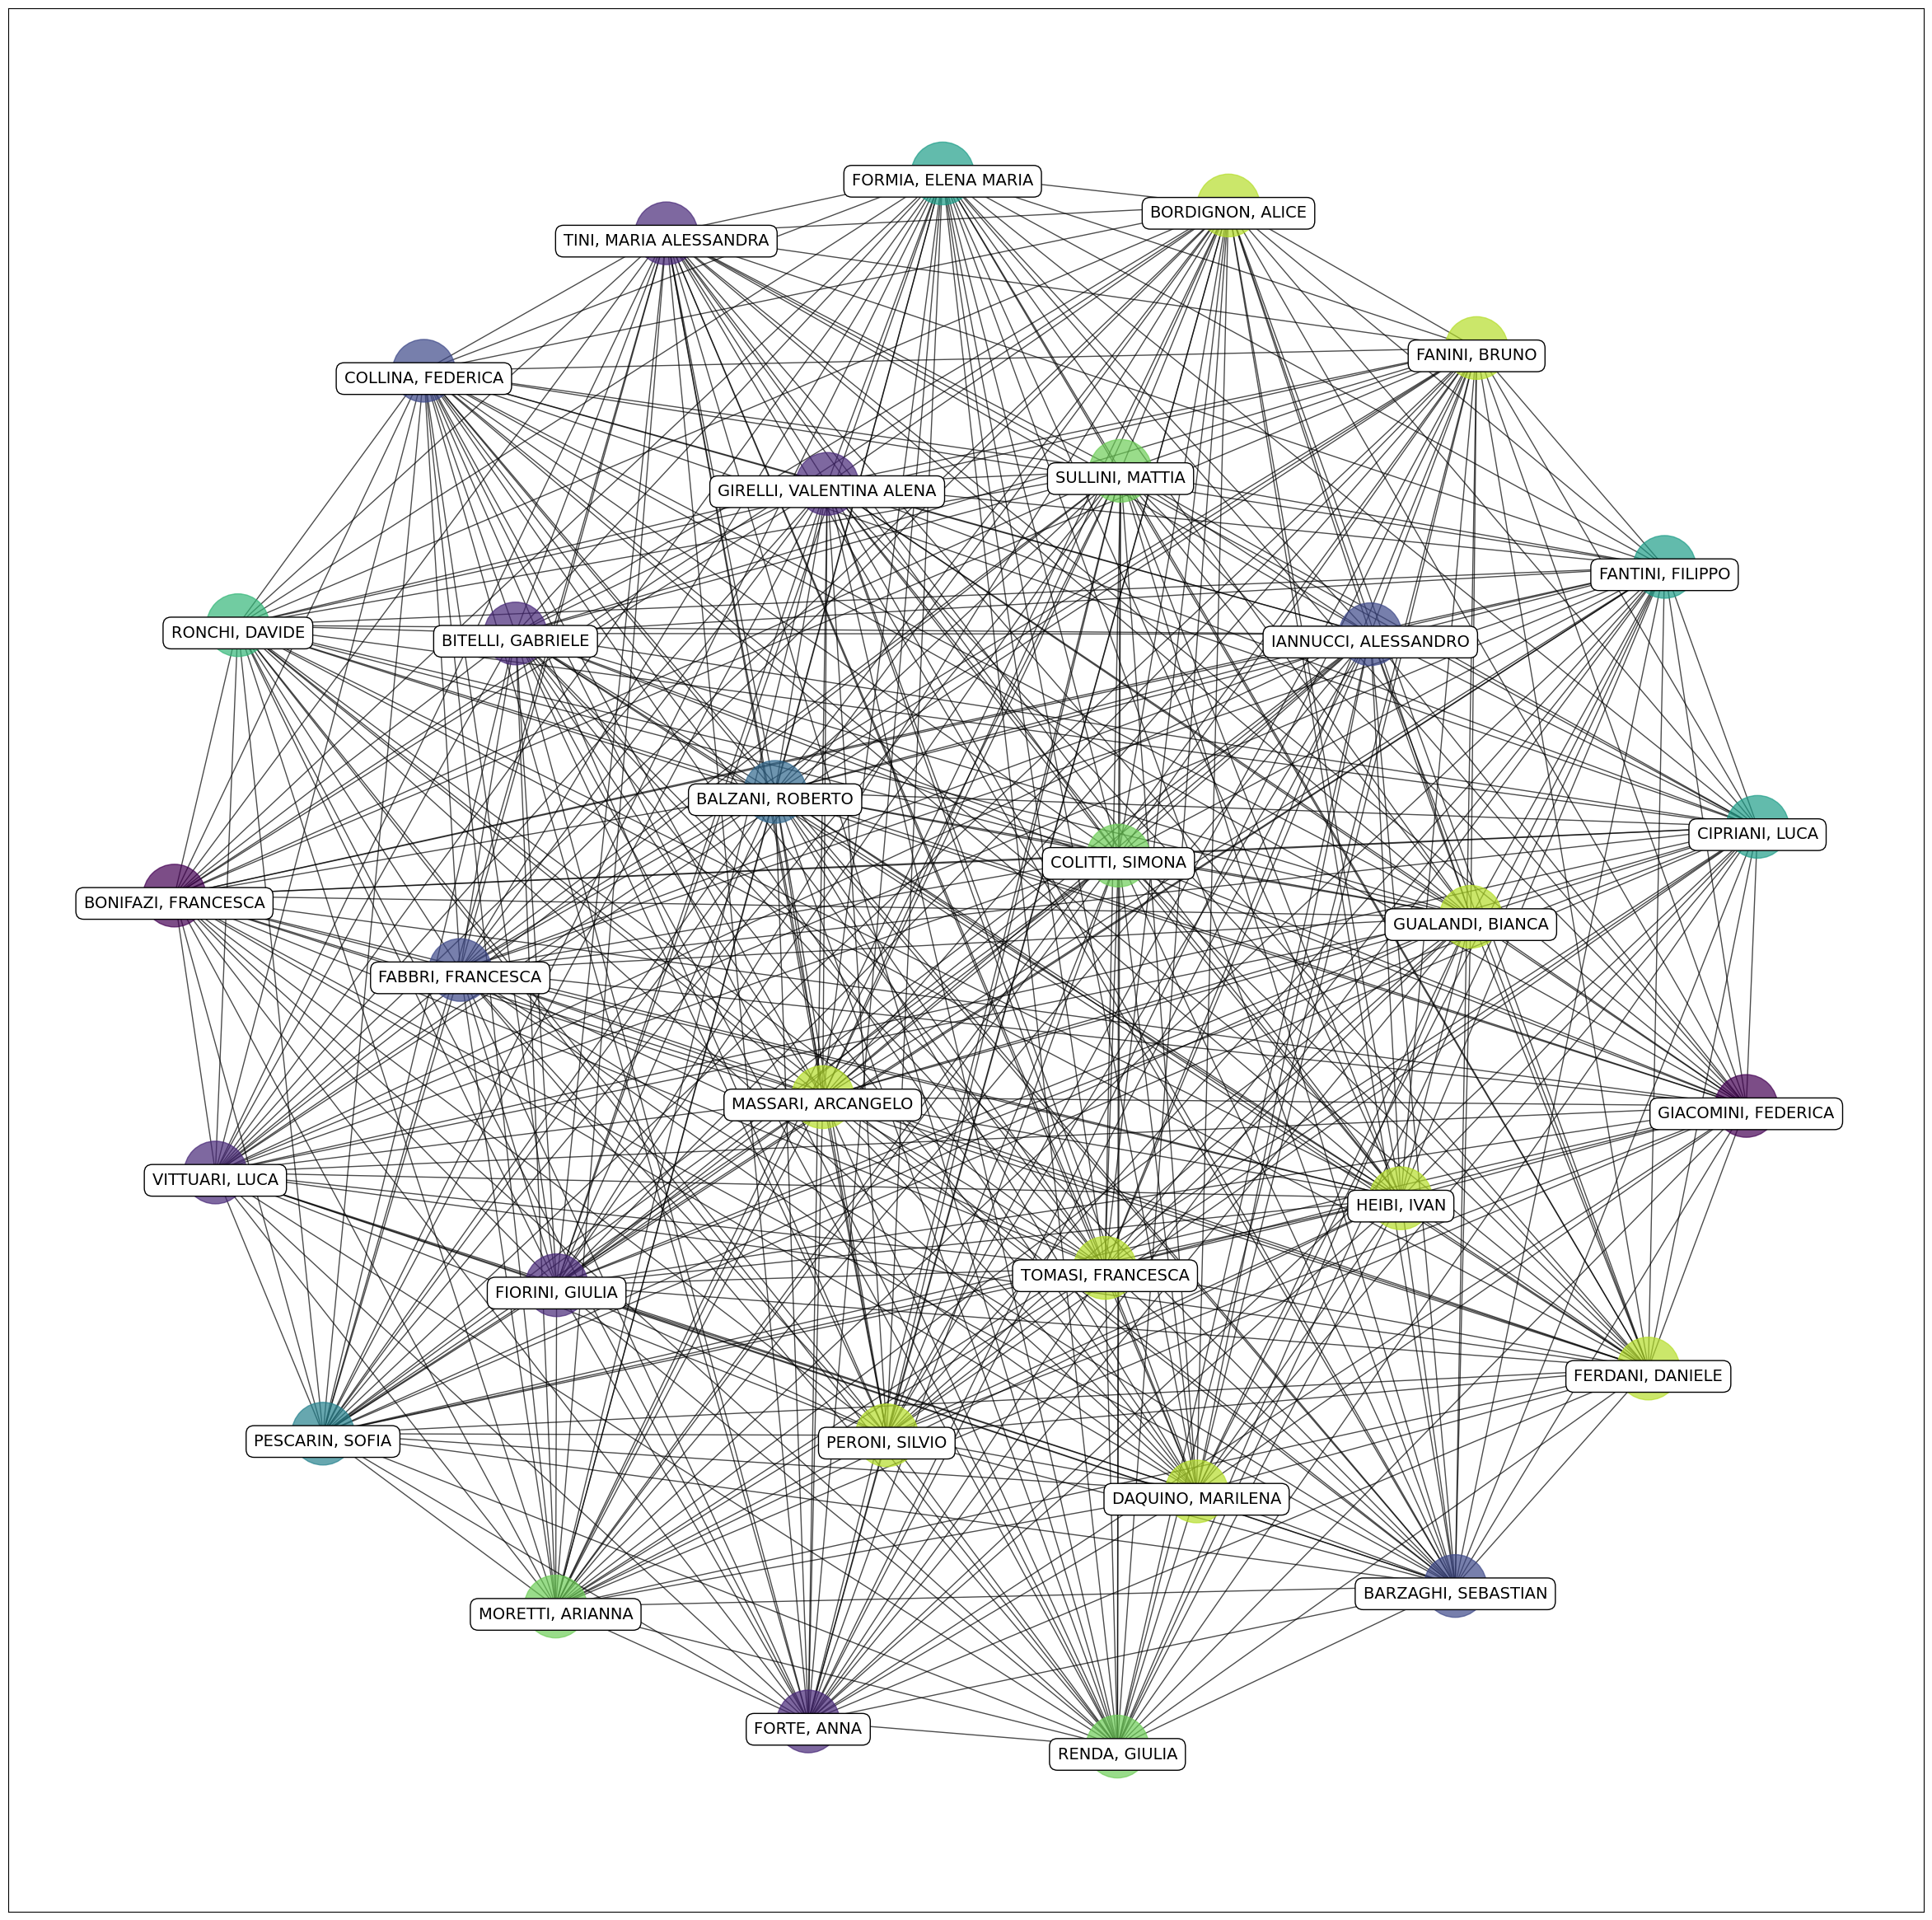

In [13]:

import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import json
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib.pyplot as plt2
k_number = nx.k_core(G, None)

node_affiliations = nx.get_node_attributes(k_number, "affiliation")

unique_affiliations = set(node_affiliations.values())
node_labels = nx.get_node_attributes(k_number, "label")

norm = mcolors.Normalize(vmin=0, vmax=len(unique_affiliations))
scalar_map = ScalarMappable(norm=norm, cmap="viridis")
color_palette = {affiliation: scalar_map.to_rgba(i) for i, affiliation in enumerate(unique_affiliations)}

pos = nx.spring_layout(k_number, iterations=100, weight="weight", k=2)
plt.figure(figsize=(30, 30))

# Draw nodes with color, size, and labels for each node in the graph
node_sizes = [100 * k_number.degree(node) for node in k_number.nodes]
node_colors = [color_palette[node_affiliations[node]] for node in k_number.nodes]

nx.draw_networkx_nodes(k_number, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(k_number, pos, alpha=0.7)

# Initialize labels with empty strings for all nodes
labels = {node: node_labels[node] if node_labels.get(node) else '' for node in k_number.nodes}
bbox_props = {'boxstyle': 'round', 'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 1, 'pad': 0.5, 'alpha': 1}

# Label nodes based on certain criteria (e.g., high degree centrality)
selected_nodes = [node for node, degree in k_number.degree() if degree > 10]
labels = {node: node for node in selected_nodes}
nx.draw_networkx_labels(k_number, pos, labels=labels, font_size=14, font_color='black', verticalalignment='top', bbox=bbox_props)

# Display the final graph
plt.show()

In [14]:
core_number = nx.core_number(G)
k_data = pd.DataFrame.from_dict(core_number,
                                    columns=["KCore"],
                                    orient="index")
k_data.sort_values(by=["KCore"], ascending=False)

KCore
VITTUARI, LUCA         30
PERONI, SILVIO         30
FANTINI, FILIPPO       30
FANINI, BRUNO          30
COLITTI, SIMONA        30
...                   ...
MIZZAU, MARINA          1
GENSINI, NICCOLO'       1
DI PIETRO, IRENE        1
PIGOZZI, MARINELLA      1
CARRETTA, SIMONA        1

[304 rows x 1 columns]

K-Core: Core number represents the level of a node in the k-core, a subgraph where each node is connected to at least k other nodes within the subgraph.

Observations:
The K-Core values range from 1 to 30, indicating a diverse set of node connectivity levels within the network.

Considerations:
Nodes with higher K-Core values are more central and well-connected within the network.
K-Core analysis helps identify the structural importance of nodes and their roles in maintaining the network's connectivity.

In [15]:
communities = nx.algorithms.community.greedy_modularity_communities(G, weight="weight")
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

modularity_value = nx.algorithms.community.modularity(G, list(communities), weight="weight")

print("Modularity:", modularity_value)

c_data = pd.DataFrame.from_dict(community_mapping,
                                columns=["Communities"],
                                orient="index")
c_data.sort_values(by=["Communities"], ascending=False)

Modularity: 0.6983881695595636


Communities
CARMASSI, PATRIZIA                 12
VENTURA, IOLANDA                   12
FINTONI, LAURENT ANTOINE           11
TRIPODI, SILVIA                    11
SABBA, FIAMMETTA                   11
...                               ...
VENTURA, GIACOMO                    0
PAOLINI, LORENZO                    0
RIPARI, EDOARDO                     0
RODLER, LUCIA                       0
PONTORIERO, IVANO                   0

[304 rows x 1 columns]

Greedy Modularity Communities:

Community Assignment:
The algorithm assigns nodes to communities based on the concept of modularity, aiming to maximize the quality of the community structure.
Each node is placed in the community that results in the highest increase in modularity.

Community Mapping:
The result is a mapping of nodes to their assigned communities, represented by numeric labels (e.g., 12, 11).
Each node is associated with the community to which it belongs.

Interpreting the Results:
Community Labels:
Nodes with the same label (e.g., 11) belong to the same community.

Community Sizes:
Some communities might have more members than others. For example, nodes labeled 0 may represent smaller or less cohesive communities.
Modularity and Weighted Graphs:

Modularity Definition:
Modularity measures the quality of a network's division into communities. Higher modularity values indicate a better community structure.

Weighted Graphs:
When the graph is weighted, the strength of connections between nodes is considered. Weighted modularity takes into account both the presence and strength of edges.

Why Weight Changes the Result:
Edge Strength Influence: In a weighted graph, the strength of connections can significantly impact community detection.
Community Formation: Nodes may be more likely to be grouped together if they share strong weighted connections.
Optimization Objective: The algorithm aims to optimize the modularity score by adjusting community assignments. Weighted edges contribute to this optimization differently than unweighted edges.

Greedy Modularity Algorithm:
Basic Idea:
Greedy Modularity algorithms iteratively add or remove nodes from communities to maximize the modularity score.

Steps:
Start with each node in its own community.
Greedily merge or split communities to maximize the modularity score.
Repeat until modularity cannot be further improved.

The results indicate that nodes are grouped into different communities based on the modularity optimization. The numeric labels represent the assigned communities, and the size of each community can vary. In a weighted graph, the strength of connections plays a crucial role in community formation, impacting the modularity optimization process.

In [16]:
def homophily(G):
    num_same_ties = 0
    num_diff_ties = 0
    for n1, n2 in G.edges():
        if G.nodes[n1]['affiliation'] == G.nodes[n2]['affiliation']:
            num_same_ties += 1
        else:
            num_diff_ties += 1
    return (num_same_ties / (num_same_ties + num_diff_ties))
print("Homophily:", homophily(G))

Homophily: 0.3519369665134603


Homophily is a measure that quantifies the tendency of nodes in a network to form connections with others that share similar attributes. In this case, it focuses on the 'affiliation' attribute.

Interpretation:
The homophily value of approximately 0.352 indicates a moderate level of similarity in affiliations among connected nodes.

Observations:
A higher homophily value suggests that nodes tend to connect more frequently with others having the same affiliation.

Implications:
The network exhibits a tendency for nodes with similar affiliations to connect, indicating a certain degree of assortative mixing.

Considerations:
Understanding homophily provides insights into the structure of the network and the patterns of connections based on shared attributes.
The interpretation may vary based on the specific attributes considered and the context of the network.

In [17]:
prof_list = ['PERONI, SILVIO', 'TOMASI, FRANCESCA', 'VITALI, FABIO', 'PESCARIN, SOFIA', 'GANGEMI, ALDO', 'ITALIA, PAOLA MARIA CARMELA', 'TAMBURINI, FABIO', 'DAQUINO, MARILENA', 'GIALLORENZO, SAVERIO', 'ZUFFRANO, ANNAFELICIA', 'IOVINE, GIULIO', 'BARTOLINI, ILARIA', 'SPEDICATO, GIORGIO', 'PALMIRANI, MONICA', 'BASKAKOVA, EKATERINA', 'FERRIANI, SIMONE']
def affiliation_homophiliy(G, nodes):
    data = []
    for node in nodes:
        affiliation = G.nodes[node]['affiliation']
        neighbors = list(G.neighbors(node))
        total_connections = len(neighbors)
        connections_outside_affiliation = sum(1 for neighbor in neighbors if G.nodes[neighbor]['affiliation'] != affiliation)
        
        ratio = 0 if total_connections == 0 else round(connections_outside_affiliation / total_connections, 2)

        data.append([node, connections_outside_affiliation, affiliation, total_connections, ratio])

    df = pd.DataFrame(data, columns=['name', 'connections_outside_affiliation', 'affiliation', 'total_connections', 'ratio'])
    return df.sort_values(by=['ratio'], ascending=False)
print(affiliation_homophiliy(G, prof_list))


KeyError: 'GIALLORENZO, SAVERIO'